### Pandas

##### Pandas is a python package used in real world data analysis providing fast and flexible data structures designed to make working with relational databases and labeled data easy. Pandas is heavily used for data wrangling( Data cleansing + data manipulation ) and data structuring

##### Few things that pandas does well are :
- Handling missing data
- Insert and deletion of columns/fields
- Explicit data alignment
- Flexible group by functionality
- Easy to convert differently indexed data into dataframe objects
- Subsetting of large data sets
- Merging and joining of data sets
- Reshaping/pivoting data sets
- cross table creation
- Robust IO tools to import and export different file types
- Time- series specific functionality, conversion of date to various date types and formats

### The Series Datastructure

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [2]:
import pandas as pd
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype=None,
    name=None,
    copy=False,
    fastpath=False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series.

    .. versionchanged:: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : array-like or Index (1d)
    Values must 

In [3]:
# String list to series
flowers = ['Tulip', 'Rose', 'Lily']
pd.Series(flowers)

0    Tulip
1     Rose
2     Lily
dtype: object

In [4]:
# Including no value in list . convert to series
flowers = ['Tulip', 'Rose', None]
pd.Series(flowers)

0    Tulip
1     Rose
2     None
dtype: object

In [5]:
#convert numbers to series
numbers = [10, 20, None]
## ??
pd.Series(numbers)


0    10.0
1    20.0
2     NaN
dtype: float64

In [6]:
import numpy as np

In [7]:
np.nan == None

False

In [8]:
np.nan == np.nan

False

In [9]:
np.isnan(np.nan)

True

In [10]:
None is None

True

In [11]:
# Dictionaries to Series
Musics = {'Rock':'Queen',
         'Pop Rock':'Coldplay',
         'Pop':'Maroon',
         'Electro':'Blow'}
Musics_Series = pd.Series(Musics)
Musics_Series

Rock           Queen
Pop Rock    Coldplay
Pop           Maroon
Electro         Blow
dtype: object

In [12]:
Musics_Series.index

Index(['Rock', 'Pop Rock', 'Pop', 'Electro'], dtype='object')

In [13]:
Serie = pd.Series(['Tulip','Rose','Lily'], index=['Netherlands','France','Italy'])
Serie

Netherlands    Tulip
France          Rose
Italy           Lily
dtype: object

#### Querying a series

In [14]:
# Dictionaries to Series
Musics = {'Rock':'Queen',
         'Pop Rock':'Coldplay',
         'Pop':'Maroon',
         'Electro':'Blow'}
Musics_Series = pd.Series(Musics)
Musics_Series

Rock           Queen
Pop Rock    Coldplay
Pop           Maroon
Electro         Blow
dtype: object

In [15]:
# locate elements by iloc function on index
Musics_Series.iloc[1]

'Coldplay'

In [16]:
# Locate by loc function on header
Musics_Series.loc['Pop']

'Maroon'

In [20]:
# Search Series by index 1
# ??
Musics_Series[1]


'Coldplay'

In [21]:
# Search by header
Musics_Series['Pop']

'Maroon'

In [22]:

Musics = {11:'Queen',
         22:'Coldplay',
         33:'Maroon',
         44:'Blow'}
S = pd.Series(Musics)
S

11       Queen
22    Coldplay
33      Maroon
44        Blow
dtype: object

In [25]:
# This return error. This won't call S.iloc[1] as one might expect, it generates an error instead
S[1]

KeyError: 1

In [26]:
S = pd.Series([100.0, 200.0,30.0,4.0])
S

0    100.0
1    200.0
2     30.0
3      4.0
dtype: float64

In [27]:
# Using for loop for sum
total = 0
for item in S:
    total+=item
print(total)   

334.0


In [28]:
# Using numpy for sum
import numpy as np
total = np.sum(S)
total

334.0

In [29]:
# Create 10000 series of numbers between 0 and 1000

S = pd.Series(np.random.randint(0,1000,10000))
S.head()

0    954
1    446
2    892
3    517
4    986
dtype: int64

In [30]:
len(S)

10000

Code performance check. Execute total in 100 iteration. 'n' denotes how many times to execute. Default of 'n' is 1 million times.
runs represent how many time the timer is repeated

In [31]:
%%timeit -n 100
summary = 0
for item in S:
    summary+=item
#print(summary)

1.34 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit -n 100
summary = np.sum(S)

The slowest run took 6.01 times longer than the fastest. This could mean that an intermediate result is being cached.
132 µs ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
# Adding new element to series
S = pd.Series([1, 2, 3])
S['flowers']='Lotus'
S

0              1
1              2
2              3
flowers    Lotus
dtype: object

In [34]:
Fresh_flowers = pd.Series({'White':'Tulip',
                          'Red':'Rose',
                          'Purple':'Lily'})
Flower_purple = pd.Series(['Cosmos','Iris','Lavender'],
                        index = ['Purple','Purple','Purple'])

Flowers = Fresh_flowers.append(Flower_purple)

In [36]:
# View Fresh_flowers series
## ??

Fresh_flowers

White     Tulip
Red        Rose
Purple     Lily
dtype: object

In [37]:
# View Flower_purple
## ??
Flower_purple


Purple      Cosmos
Purple        Iris
Purple    Lavender
dtype: object

In [38]:
Flowers

White        Tulip
Red           Rose
Purple        Lily
Purple      Cosmos
Purple        Iris
Purple    Lavender
dtype: object

In [39]:
# Locate only 'Purple' from 'Flowers' series
## ??

Flowers.loc['Purple']

Purple        Lily
Purple      Cosmos
Purple        Iris
Purple    Lavender
dtype: object

### The DataFrame Data Structure

In [40]:
# Create DataFrame from Series
import pandas as pd

Transaction_1 = pd.Series({'Item#' : '01',
                          'Item Name' : 'Dog food',
                           'Cost' : 21.50})
Transaction_2 = pd.Series({'Item#' : '02',
                          'Item Name' : 'Cat food',
                          'Cost' : 15.10})
Transaction_3 = pd.Series({'Item#' : '03',
                          'Item Name' : 'Bird food',
                          'Cost' : 12.50})
df = pd.DataFrame([Transaction_1,Transaction_2,Transaction_3], index=['Store1','Store2','Store2'])
df

,Item#,Item Name,Cost
Store1,01,Dog food,21.5
Store2,02,Cat food,15.1
Store2,03,Bird food,12.5


In [41]:
# Search for Store2
df.loc['Store2']

,Item#,Item Name,Cost
Store2,02,Cat food,15.1
Store2,03,Bird food,12.5


In [42]:
#Data type
type(df.loc['Store2'])

pandas.core.frame.DataFrame

In [43]:
# Locate Store1
## ??
df.loc['Store1']


Item#              01
Item Name    Dog food
Cost             21.5
Name: Store1, dtype: object

In [44]:
#Data type of Store1
## ??
type(df.loc['Store1'])



pandas.core.series.Series

In [45]:
df.loc['Store2','Cost']

Store2    15.1
Store2    12.5
Name: Cost, dtype: float64

In [46]:
#Transpose the DataFrame view
df.T

,Store1,Store2,Store2
Item#,01,02,03
Item Name,Dog food,Cat food,Bird food
Cost,21.5,15.1,12.5


In [47]:
# View all the records for columns Item# and Cost
df.loc[:,['Item#','Cost']]

,Item#,Cost
Store1,01,21.5
Store2,02,15.1
Store2,03,12.5


In [48]:
#Delete a record
df.drop('Store1')

,Item#,Item Name,Cost
Store2,02,Cat food,15.1
Store2,03,Bird food,12.5


In [49]:
# Now view the DataFrame
df

,Item#,Item Name,Cost
Store1,01,Dog food,21.5
Store2,02,Cat food,15.1
Store2,03,Bird food,12.5


In [50]:
# Copy the DataFrame to a different variable and redo the steps

df_copy = df.copy()
df_copy = df_copy.drop('Store1')
df_copy

,Item#,Item Name,Cost
Store2,02,Cat food,15.1
Store2,03,Bird food,12.5


In [ ]:
#df_copy.drop?

In [51]:
del df_copy['Item#']


In [52]:
# View df_copy

df_copy

,Item Name,Cost
Store2,Cat food,15.1
Store2,Bird food,12.5


In [53]:
# Add new variable 'location' with content as None
df['location'] = None
df

,Item#,Item Name,Cost,location
Store1,01,Dog food,21.5,None
Store2,02,Cat food,15.1,None
Store2,03,Bird food,12.5,None


In [54]:
# Assign 'Cost' to new variable
costs = df['Cost']
costs

Store1    21.5
Store2    15.1
Store2    12.5
Name: Cost, dtype: float64

In [55]:
# Increment cost by 2
costs+=2
costs

Store1    23.5
Store2    17.1
Store2    14.5
Name: Cost, dtype: float64

In [56]:
# View the dataframe 'df'
## ?? 

df


,Item#,Item Name,Cost,location
Store1,01,Dog food,23.5,None
Store2,02,Cat food,17.1,None
Store2,03,Bird food,14.5,None


<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. 
In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame. 
The file path can be either an URL or your local file address.<br>
Because the data does not include headers, we can add an argument <code>headers = None</code>  inside the  <code>read_csv()</code> method, so that pandas will not automatically set the first row as a header.<br>
You can also assign the dataset to any variable you create.
</p>

In [57]:
import pandas as pd

In [58]:
path = ("auto.csv")
data_f = pd.read_csv(path, header=None)

After reading the dataset, we can use the <code>dataframe.head(n)</code> method to check the top n rows of the dataframe; where n is an integer. Contrary to <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> will show you the bottom n rows of the dataframe.


In [59]:
# first 5 rows using dataframe.head() method
print("Here are the first 5 rows of the dataframe") 
data_f.head(5)

Here are the first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [60]:
# Write the code to show bottom five rows of the dataframe
#
data_f.tail()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<h3>Add Headers</h3>
<p>
Take a look at our dataset; pandas automatically set the header by an integer from 0.
</p>
<p>
To better describe our data we can introduce a header,thus, we have to add headers manually.
</p>
<p>
Firstly, we create a list "headers" that include all column names in order.
Then, we use <code>dataframe.columns = headers</code> to replace the headers by the list we created.
</p>

In [61]:
# Let's create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Headers are:\n", headers)

Headers are:
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


Use the Pandas method <b>read_csv()</b> to load the data from file path. Set the parameter  "names" equal to the Python list "headers".

In [62]:
data_f.columns = headers
data_f.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Drop missing values along the column"price":

In [63]:
# Axis=0 refers to the rows in dataframe or in an array
data_f.dropna(subset=["price"], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [64]:
# Find the name of the columns of the dataframe
## ??
data_f.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [68]:
# Find the datatypes of the dataframe
## ??
data_f.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Save Dataset

Pandas allows us to save the dataset to csv by using the <code>dataframe.to_csv()</code> method, you can add the file path and name along with quotation marks in the brackets.
</p>
<p>
    For example, if you save the dataframe <b>df</b> as <b>automobile.csv</b> to your local machine, you may use the syntax below:
</p>

In [69]:
data_f.to_csv("automobile.csv", index=False)

 We can also read and save other file formats, we can use similar functions to **`pd.read_csv()`** and **`df.to_csv()`** for other data formats, the functions are listed in the following table:

<h2>Read/Save Other Data Formats</h2>



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |

## Time to explore the dataset from DataFrame

#### Data Types

Main types stored in Pandas dataframes are object, float, int, bool and datetime64.

In [70]:
data_f.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Statistical summary
   dataframe.describe()



In [71]:
# Summary statistics excluding NaN (Not a number) values and columns
data_f.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [72]:
# Summary statistics of all the rows and  columns with object type attributes
# We can see unique values and the frequency of top value in the object- typed columns

data_f.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [73]:
data_f.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

##### you can select the columns of a data frame by indicating the name of each column, for example, you can select the three columns as follows:

<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3']]</code>
</p>
 Where "column" is the name of the column, you can apply the method  ".describe()" to get the statistics of those columns as follows:
</p>
<p>
    <code>dataframe[[' column 1 ',column 2', 'column 3'] ].describe()</code>
</p>

Apply the  method to ".describe()" to the columns 'length' and 'compression-ratio'.
</div>                    

In [75]:
# Write your code below and press Shift+Enter to execute. select columns 'length' and 'compression-ratio'

data_f[['length','compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


##### Another method you can use to check your dataset is :
  dataframe.info


In [ ]:
#pd.set_option('display.max_rows',data_f.shape[0]+1)

In [76]:
# Write the code to look at the info of your DataFrame.

data_f.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

### Data Wrangling

Let's convert data from initial format to a format that may be better for analysis

In [77]:
data_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### How to work with missing data ?

Steps to work with missing data:
- Identify missing data
- Deal with missing data
- Correct data format

#### Identify and handle missing values

- replace(x, y, inplace = True) to replace x by y

In [78]:
import numpy as np
# replace "?" to NaN
data_f.replace("?", np.nan, inplace = True)
data_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identifying missing values

##### We will use python's in-built funtions to identify missing values in two methods:
 - .isnull()
 - .notnull()
 
 with an output of boolean value indicating whether the value that is passed into the argument is iin fact missing data



In [79]:
# you may use head(value) to see more rows
missing_data = data_f.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stand for missing value, "False" stands for not missing value

#### Count the missing values in each column

using a For loop, we can quickly figure out the number of missing values in each column. ".value_counts()" counts the number of "True" values


In [85]:
for column in missing_data.columns.values.tolist():
    print(column)
###1) print the column names
    print(missing_data[column].value_counts())
###2) print space between colummns 
    print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

In [ ]:
# How many columns contain missing data? List those columns



#### Deal with missing data
How to deal ?
<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entried in the column are empty. In this dataset we have freedom to choose which method to replace data. Let's apply the methods to selective columns:

In [ ]:
# Replace by mean
## Identify the columns to be replaced by mean


normalized-losses, stroke, bore, horsepower, peak-rpm



In [ ]:
# Replace by frequency
## Identify the columns to be replaced by frequency


number-of-doors




In [ ]:
##












##### Calculate the average of the column

In [86]:
avg_norm_loss = data_f["normalized-losses"].astype("float").mean(axis=0)
print("Avg of normalized-losses:",avg_norm_loss)

Avg of normalized-losses: 122.0


In [87]:
# Replace 'NaN' by mean in "normalized-losses" column
data_f["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [88]:
#Calculate the mean value for ' bore' column
avg_bore=data_f['bore'].astype('float').mean(axis=0)
print("Avg of bore:", avg_bore)

Avg of bore: 3.3297512437810957


In [89]:
#Replace NaN in 'bore'
data_f["bore"].replace(np.nan, avg_bore, inplace=True)

In [94]:
#### Now replace Nan in 'Stroke' column by mean
#avg_stroke
avg_stroke=data_f["stroke"].astype('float').mean(axis=0)
print("Average of stroke:",avg_stroke)
data_f['stroke'].replace(np.nan,avg_stroke,inplace=True)

Average of stroke: 3.2554228855721337


In [95]:
# calculate the mean value for the horsepower and replace the NaN values
#avg_horsepower

avg_horsepower = data_f['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
data_f['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


Average horsepower: 104.25615763546799


In [96]:
# Calculate the mean value for 'peak-rpm' column and replace Nan values
#avg_peakrpm

avg_peakrpm=data_f['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
data_f['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


Average peak rpm: 5125.369458128079


To see which values are present in a particular column, we can use the ".value_counts()" method:

In [97]:
data_f['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [98]:
data_f['num-of-doors'].value_counts().idxmax()

'four'

In [99]:
#replace the missing 'num-of-doors' values by the most frequent 
data_f["num-of-doors"].replace(np.nan, "four", inplace=True)

In [100]:
# simply drop whole row with NaN in "price" column
data_f.dropna(subset=["price"], axis=0, inplace=True)

#Make it a practise to reset index, because we dropped two rows
data_f.reset_index(drop=True, inplace=True)

#### Correct data format
The last step in data cleaning is checking and making sure that all data is in teh correct format(int, float, text or other)

In pandas we use,
- .dtype() to check the data type
- .astype() to change the data type

In [102]:
# Now list the data types of the dataframe. Are they in correct format?
# check the numerical variables
# use astype() method for any changes

#data_f.dtypes

data_f[["bore", "stroke"]] = data_f[["bore", "stroke"]].astype("float")
data_f[["normalized-losses"]] = data_f[["normalized-losses"]].astype("int")
data_f[["price"]] = data_f[["price"]].astype("float")
data_f[["peak-rpm"]] = data_f[["peak-rpm"]].astype("float")


In [103]:
# now check the data types


data_f.dtypes



symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Data Standardization
Data is usually obtained in different formats. Data standardization is used to normalize the data where we substract the mean and divide by the standard deviation

So, let's convert the data into common format to make meaningul comparison

For example: Transform mpg to L/100km   [mpg-miles per gallon]

Formula for unit conversion is:
L/100km = 235/mpg

Let's tranform "city-mpg" and "highway-mpg"

In [104]:
data_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [105]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
data_f['city-L/100km'] = 235/data_f["city-mpg"]

# check your transformed data 
data_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


#### Now convert "highway-mpg" to "highway-L/100km"

In [106]:
# Write your code here

data_f['highway-L/100km']=235/data_f['highway-mpg']
#data_f.rename(columns={'"highway-mpg"':'highway-L/100km'},inplace=True)
data_f.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


#### Data Normalization

Is a process of transforming values of several variables intoa  similar range. scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or so the range is between 0 to 1.

For example: Let's say we want to scale the columns"length","width","height"

Target is : would like to normalize those variable so their value ranges from 0 to 1

Approach : replace original value by (original value)/(maximum value)

In [107]:
# replace (original value) by (original value)/(maximum value)
data_f['length'] = data_f['length']/data_f['length'].max()
data_f['width'] = data_f['width']/data_f['width'].max()

In [108]:
### Now normalize the colum "height" and view the three variables and top 5 rows
# data_f[["length","width","height"]].head()

data_f['height']=data_f['height']/data_f['height'].max()
data_f[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


##### Indicator variable ( or dummy variable)

Numerical variable used to label categories. They are called 'dummies'
this will be useful for several models such as regression model

In [109]:
dummy_variable_1 = pd.get_dummies(data_f["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [110]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Let's insert this column back to original dataset

In [111]:
# merge data frame "df" and "dummy_variable_1" 
data_f = pd.concat([data_f, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
data_f.drop("fuel-type", axis = 1, inplace=True)

In [112]:
data_f.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1


In [ ]:
#### Now do the same for "aspiration". assign to variable "aspiration_1"









In [ ]:
Let's export this result to file named "Clean_dataframe.csv"

#data_f.to_csv('Clean_dataframe.csv')

### Pivot Tables

In [113]:
# CO2 in gm/km
pivot_df = pd.read_csv("cars.csv")

In [114]:
pivot_df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CO2
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,198
...,...,...,...,...,...,...,...,...,...
14248,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,237
14249,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,230
14250,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,237
14251,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,225


In [115]:
pivot_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CO2
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,198


In [116]:
pivot_df.pivot_table(values='CO2',index='YEAR', columns='MAKE', aggfunc=np.mean)

MAKE,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUGATTI,BUICK,CADILLAC,CHEVROLET,...,SAAB,SATURN,SCION,SMART,SRT,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN,VOLVO
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,218.777778,NaN,NaN,244.590909,NaN,254.724138,NaN,238.166667,284.000000,279.507937,...,234.333333,187.200000,NaN,NaN,NaN,214.250000,196.769231,237.465116,208.944444,238.047619
2001,222.545455,NaN,NaN,252.875000,NaN,252.372093,NaN,234.666667,262.250000,280.350000,...,229.466667,186.800000,NaN,NaN,NaN,216.615385,209.133333,238.027778,206.371429,228.916667
2002,220.545455,NaN,NaN,255.458333,407.833333,250.155556,NaN,239.375000,314.600000,292.906667,...,225.800000,198.333333,NaN,NaN,NaN,227.312500,228.545455,229.727273,205.823529,229.772727
2003,221.250000,NaN,NaN,244.172414,422.800000,250.875000,NaN,238.125000,304.000000,307.450704,...,218.937500,214.230769,NaN,NaN,NaN,228.160000,214.388889,226.804878,207.391304,234.590909
2004,211.583333,NaN,NaN,246.303030,444.000000,244.295082,NaN,265.307692,295.750000,304.946237,...,224.300000,211.416667,NaN,NaN,NaN,229.677419,223.733333,226.121951,212.382979,236.500000
2005,216.230769,NaN,NaN,248.057143,425.666667,245.515152,NaN,253.928571,298.944444,291.690000,...,227.962963,223.916667,NaN,113.0,NaN,226.033333,211.363636,214.414634,213.921569,234.371429
2006,210.909091,NaN,NaN,247.555556,415.250000,253.017857,NaN,259.538462,285.166667,277.756757,...,240.500000,217.166667,NaN,113.0,NaN,226.181818,208.692308,222.944444,211.629630,231.108108
2007,222.181818,NaN,356.500000,256.281250,398.800000,253.250000,NaN,255.100000,279.666667,271.803150,...,239.833333,218.909091,NaN,NaN,NaN,224.857143,209.285714,223.942857,215.689655,234.763158
2008,222.181818,NaN,356.500000,253.044444,400.200000,251.771429,NaN,244.857143,269.052632,265.827273,...,250.521739,221.947368,NaN,124.0,NaN,220.468750,204.437500,231.771429,212.464286,232.696970


In [117]:
# returns both mean and min
pivot_df.pivot_table(values='CO2', index='YEAR', columns='MAKE', aggfunc=[np.mean,np.min], margins=True)

mean                                                              \
MAKE       ACURA ALFA ROMEO ASTON MARTIN        AUDI     BENTLEY         BMW   
YEAR                                                                           
2000  218.777778        NaN          NaN  244.590909         NaN  254.724138   
2001  222.545455        NaN          NaN  252.875000         NaN  252.372093   
2002  220.545455        NaN          NaN  255.458333  407.833333  250.155556   
2003  221.250000        NaN          NaN  244.172414  422.800000  250.875000   
2004  211.583333        NaN          NaN  246.303030  444.000000  244.295082   
2005  216.230769        NaN          NaN  248.057143  425.666667  245.515152   
2006  210.909091        NaN          NaN  247.555556  415.250000  253.017857   
2007  222.181818        NaN   356.500000  256.281250  398.800000  253.250000   
2008  222.181818        NaN   356.500000  253.044444  400.200000  251.771429   
2009  220.800000        NaN   340.833333  252.027778  408.000000  255.030303   
2010  219.500000        NaN   334.666667  243.156250  385.000000  255.756098   
2011  218.384615        NaN   330.333333  248.361111  359.800000  240.000000   
2012  223.900000        NaN   330.000000  246.888889  358.833333  241.100000   
2013  203.750000        NaN   307.800000  213.700000  363.000000  229.421053   
2014  195.500000      177.0   309.857143  239.833333  344.000000  219.046875   
All   216.276471      177.0   332.945455  246.272537  392.032258  245.691880   

                                                  ...   amin                \
MAKE BUGATTI       BUICK    CADILLAC   CHEVROLET  ... SATURN  SCION  SMART   
YEAR                                              ...                        
2000     NaN  238.166667  284.000000  279.507937  ...  156.0    NaN    NaN   
2001     NaN  234.666667  262.250000  280.350000  ...  156.0    NaN    NaN   
2002     NaN  239.375000  314.600000  292.906667  ...  156.0    NaN    NaN   
2003     NaN  238.125000  304.000000  307.450704  ...  196.0    NaN    NaN   
2004     NaN  265.307692  295.750000  304.946237  ...  182.0    NaN    NaN   
2005     NaN  253.928571  298.944444  291.690000  ...  184.0    NaN  113.0   
2006     NaN  259.538462  285.166667  277.756757  ...  184.0    NaN  113.0   
2007     NaN  255.100000  279.666667  271.803150  ...  172.0    NaN    NaN   
2008     NaN  244.857143  269.052632  265.827273  ...  168.0    NaN  124.0   
2009     NaN  241.857143  272.454545  256.556391  ...  159.0    NaN  124.0   
2010   508.0  242.500000  249.047619  244.711538  ...    NaN    NaN  124.0   
2011   490.0  223.384615  257.720000  253.949153  ...    NaN  154.0  124.0   
2012   490.0  208.111111  260.227273  262.783784  ...    NaN  117.0  122.0   
2013     NaN  205.600000  245.062500  255.205882  ...    NaN  117.0  122.0   
2014     NaN  204.437500  251.750000  238.709302  ...    NaN  117.0  122.0   
All    496.0  233.329341  267.957692  270.228142  ...  156.0  117.0  113.0   

                                                        
MAKE    SRT SUBARU SUZUKI TOYOTA VOLKSWAGEN  VOLVO All  
YEAR                                                    
2000    NaN  207.0  131.0  145.0      138.0  218.0  83  
2001    NaN  207.0  131.0  106.0      138.0  202.0  83  
2002    NaN  218.0  168.0  106.0      138.0  214.0  83  
2003    NaN  216.0  179.0  106.0      135.0  207.0  83  
2004    NaN  212.0  175.0   94.0      148.0  207.0  83  
2005    NaN  205.0  168.0   94.0      148.0  209.0  83  
2006    NaN  205.0  172.0   94.0      148.0  205.0  83  
2007    NaN  205.0  172.0   94.0      189.0  207.0  94  
2008    NaN  209.0  172.0   94.0      189.0  205.0  94  
2009    NaN  209.0  159.0   94.0      186.0  207.0  94  
2010    NaN  184.0  154.0   87.0      175.0  200.0  87  
2011    NaN  182.0  159.0   87.0      175.0  198.0  87  
2012    NaN  152.0  166.0   85.0      175.0  198.0  85  
2013  345.0  152.0  166.0   85.0      101.0  193.0  85  
2014  345.0  150.0    NaN   87.0      1

In [118]:
Group = pivot_df.groupby(['YEAR','MAKE']).agg({'CO2':['mean','min','max'] })
#Group.reset_index()
Group

CO2          
                       mean  min  max
YEAR MAKE                            
2000 ACURA       218.777778  175  269
     AUDI        244.590909  193  269
     BMW         254.724138  223  336
     BUICK       238.166667  223  253
     CADILLAC    284.000000  258  382
...                     ...  ...  ...
2014 SRT         345.000000  345  345
     SUBARU      193.608696  150  262
     TOYOTA      202.979592   87  340
     VOLKSWAGEN  187.781250  101  246
     VOLVO       224.545455  193  258

[580 rows x 3 columns]

### Date functionality in pandas

In [119]:
import pandas as pd
import numpy as np

In [120]:
pd.Timestamp('1/1/2020 00:05AM')

Timestamp('2020-01-01 00:05:00')

In [121]:
pd.Period('1/2020')

Period('2020-01', 'M')

In [122]:
pd.Period('1/20/2020')

Period('2020-01-20', 'D')

### Converting to Datetime

In [123]:
Date_1 = ['1 Jan 2020', 'Aug 29, 2019', '2018-06-26', '7/12/19']
ts = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=Date_1, columns=list('ab'))
ts

,a,b
1 Jan 2020,80,33
"Aug 29, 2019",99,27
2018-06-26,84,44
7/12/19,83,70


In [124]:
ts.index = pd.to_datetime(ts.index)
ts

,a,b
2020-01-01,80,33
2019-08-29,99,27
2018-06-26,84,44
2019-07-12,83,70


In [125]:
# Identify dayfirst
pd.to_datetime('2.7.20', dayfirst=True)

Timestamp('2020-07-02 00:00:00')

In [126]:
date_w = pd.date_range('10-01-2019', periods=9, freq='2W-SUN')
date_w

DatetimeIndex(['2019-10-06', '2019-10-20', '2019-11-03', '2019-11-17',
               '2019-12-01', '2019-12-15', '2019-12-29', '2020-01-12',
               '2020-01-26'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [127]:
date_check = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=date_w)
date_check

,Count 1,Count 2
2019-10-06,102,116
2019-10-20,109,127
2019-11-03,106,117
2019-11-17,110,123
2019-12-01,105,124
2019-12-15,108,120
2019-12-29,106,116
2020-01-12,111,126
2020-01-26,119,126


In [128]:
import calendar
date_check.index.day_name()

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [129]:
date_check.diff()

,Count 1,Count 2
2019-10-06,NaN,NaN
2019-10-20,7.0,11.0
2019-11-03,-3.0,-10.0
2019-11-17,4.0,6.0
2019-12-01,-5.0,1.0
2019-12-15,3.0,-4.0
2019-12-29,-2.0,-4.0
2020-01-12,5.0,10.0
2020-01-26,8.0,0.0


In [130]:
date_check.resample('M').mean()

,Count 1,Count 2
2019-10-31,105.500000,121.5
2019-11-30,108.000000,120.0
2019-12-31,106.333333,120.0
2020-01-31,115.000000,126.0


In [131]:
date_check['2019-11':]

,Count 1,Count 2
2019-11-03,106,117
2019-11-17,110,123
2019-12-01,105,124
2019-12-15,108,120
2019-12-29,106,116
2020-01-12,111,126
2020-01-26,119,126


In [132]:
date_check.asfreq('W', method='ffill')

,Count 1,Count 2
2019-10-06,102,116
2019-10-13,102,116
2019-10-20,109,127
2019-10-27,109,127
2019-11-03,106,117
2019-11-10,106,117
2019-11-17,110,123
2019-11-24,110,123
2019-12-01,105,124
2019-12-08,105,124


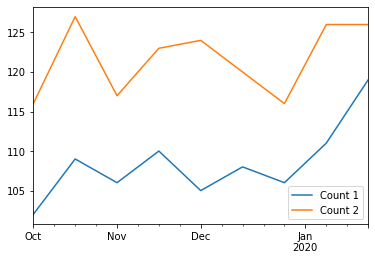

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
date_check.plot()
plt.show()

In [ ]:
pivot_df.head()